#TREAP
##Nhóm 2 - CS523.N11



In [9]:
import numpy as np
from numpy.random import seed, randint
import ipywidgets as widgets
from ipywidgets import interact, interactive_output, HBox, VBox, Layout
from IPython.display import display, clear_output, SVG, HTML
import graphviz as gv
from graphviz import Digraph
import pydot
import random

In [10]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.priority = randint(0, 1000)
    def to_string(self):
        return str(self.key) + "  " + str(self.priority)
    def print(self):        
        print("TreeNode: %d" % (self.key))


In [11]:
class BST(object):
    def getroot(self):
      return root
    def leftrotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        return y
    def rightrotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        return y
    def __init__(self):
        self.root = None
        self.list = []
    def insert(self, root, k):
        if not root:
          return TreeNode(k)
        elif k < root.key:
          root.left = self.insert(root.left, k)
          if root.left.priority > root.priority:
            return self.rightrotate(root)
        else:
          root.right = self.insert(root.right, k)      
          if root.right.priority > root.priority:
            return self.leftrotate(root)   
        return root
    def search(self, root, k):
        if (root == None or root.key == k):
            return root
        if (k < root.key):
            return self.search(root.left, k)
        else: 
            return self.search(root.right, k)
    
   

    def delete(self, root, k):
        if root == None:
          return root
        if (k < root.key):
          root.left = self.delete(root.left, k)
        elif (k > root.key):
          root.right = self.delete(root.right, k)
        elif root.left == None:
          temp = root.right
          root = None
          root = temp
        elif root.right == None:
          temp = root.left
          root = None
          root = temp
        elif root.left.priority < root.right.priority:
          root = self.leftrotate(root)
          root.left = self.delete(root.left, k)
        else:
          root = self.rightrotate(root)
          root.right = self.delete(root.right, k)
        return root
                       

        

    def height(self, x):
        if (x == None):
            return 0
        else: 
            return 1 + np.maximum(self.height(x.left),  self.height(x.right))


    def visualize(self, root, node = None):   
        ''' Visualize the tree using graphviz '''
        tree = root           
        # Recursively add nodes and edges
        def add_nodes_edges(tree, dot=None):
            col = "black"           
            # Create Graphviz Digraph 
            if dot is None:
                dot = Digraph()
                dot.node(name=str(tree), label="k:" + str(tree.key) + "\np:" + str(tree.priority), 
                         color = col, shape="circle", fixedsize="True", width="0.8")              
            # if (node!=None and tree.key == node.key):
            #   col = "green"
            # Add nodes recursively
            if tree.left:            
                if (node != None and tree.left.key == node.key):                   
                    col = "green"  
                dot.node(name=str(tree.left), label="k:" + str(tree.left.key) + "\np:" + str(tree.left.priority), 
                         color = col, shape="circle", fixedsize="True", width="0.8")
                dot.edge(str(tree), str(tree.left))
                dot = add_nodes_edges(tree.left, dot=dot)               
            if tree.right:
                if (node != None and tree.right.key == node.key): 
                    col = "red" 
                dot.node(name=str(tree.right), label= "k:" + str(tree.right.key) + "\np:" + str(tree.right.priority), 
                         color = col, shape="circle", fixedsize="True", width="0.8")
                dot.edge(str(tree), str(tree.right))
                dot = add_nodes_edges(tree.right, dot=dot)            
            return dot        
        return add_nodes_edges(tree)   

Insert


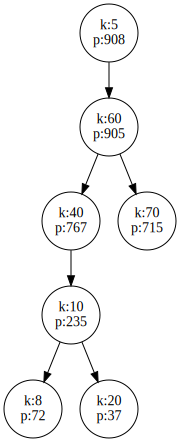

In [18]:
bst = BST()
root = None
print('Insert')
root = bst.insert(root, 20)
root = bst.insert(root, 10)

root = bst.insert(root, 5)

root = bst.insert(root, 8)
root = bst.insert(root, 40)
root = bst.insert(root, 60)
root = bst.insert(root, 70)


dot = bst.visualize(root)
display(dot)


# Visualization Treap


In [13]:
root = None

In [17]:

import ipywidgets as widgets
from ipywidgets import BoundedIntText, Button, HTML, Tab, HBox, VBox, Output
tree = BST() 
out, out1 = Output(), Output()
tab = Tab(children = [out1], 
                  layout=Layout(width='100%', height='auto'))
tab.set_title(0, 'TREAP')
ui_key = BoundedIntText(value=20, min=0, max=1000, 
                        step=2, description='Nhập khóa:', disabled=False)

# Buttons
btn_insert = Button(description='Chèn', button_style='success')


def on_button_insert_clicked(b):
  
    global root
    with out:
        clear_output()
        
        root = tree.insert(root, ui_key.value)
        dot = tree.visualize(root)
        display(dot)       
btn_insert.on_click(on_button_insert_clicked)

btn_delete = Button(description='Xóa', button_style='primary')
def on_button_delete_clicked(b):
    global root

    with out:
        clear_output()
        root = tree.delete(root, ui_key.value)
        if root != None:
          dot = tree.visualize(root)
          display(dot)       
        else:
          clear_output()
        
          
btn_delete.on_click(on_button_delete_clicked)

btn_reset = Button(description='Reset', button_style='danger')
def on_button_reset_clicked(b):
    global root
    with out:
        clear_output()
        root = None

btn_reset.on_click(on_button_reset_clicked)

btn_search = Button(description='Tìm kiếm', button_style='info')
def on_button_search_clicked(b):
    global root
    with out:

        foundnode = tree.search(root, ui_key.value)
        if (foundnode != None):
            print('Tìm thấy node!')
        else:
            print('Không tìm thấy node!')
           
                
            
btn_search.on_click(on_button_search_clicked)

btn_rnd = widgets.Button(description='Random', button_style='warning')
seed(1)
def on_button_rnd_clicked(b):
    global root
    with out:
        clear_output()
        key = randint(0, 100)
        root = tree.insert(root, key)
        dot = tree.visualize(root)
        display(dot)
btn_rnd.on_click(on_button_rnd_clicked)

layout_displ=Layout(height='500px', border='1px dotted blue', overflow ='auto')
layout_ctrl=Layout(height='50px')
with out1: 
    msgbox = HTML("<p></p>")
    displ = HBox([out], layout=layout_displ)
    ctrl = HBox([ui_key, btn_insert, btn_delete, btn_search, btn_rnd, btn_reset], layout=layout_ctrl)
    display(VBox([displ,  msgbox, ctrl]))
display(tab)